# Week 3 exercises

## Part 1: Small world networks

### Questions on the book 

#### What's the problem with random networks as a model for real-world networks according to the argument on p. 11-12?

Random networks fail to capture the degree distribution of real-world networks. The random network model underestimates the number of high and low degree nodes, as the Poisson distribution used by the model predicts the majority of nodes to have degrees in the neighborhood of ⟨k⟩.

#### List the four regimes that characterize random networks as a function of ⟨k⟩.

The four regimes that define random networks are :
* Subcritical regime : 0 ‹ ‹k› ‹ 1
* Critical point : ‹k› = 1
* Supercritical regime : ‹k› › 1
* Connected regime : ‹k› › ln(N)


#### According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering C(k) decreases as a function of k in real-world networks?

The decrease as a function of k is a problem for random networks because it shown that the clustering coefficient is independent of a node degree but in fact in real networks the clustering coefficient decreases with the node largely (and is somewhat independent of the network size). 

### Questions on Watts-Strogatz (WS) model

#### First, let's use networkx to play around with WS graphs. Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p=0, 0.1, and 1. Calculate the average shortest path length ⟨d⟩ for each one. Describe what happens to the network when p=1. 


In [4]:
%matplotlib inline 

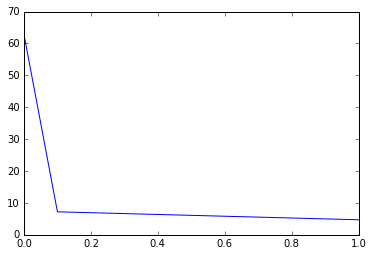

62.875751503 7.20833667335 4.71361923848


In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Number of nodes
N = 500
# Average degree
k = 4

# Create 3 graphs with varying rewiring probabilities
WS1 = nx.watts_strogatz_graph(N, k, p=0)
WS2 = nx.watts_strogatz_graph(N, k, p=0.1)
WS3 = nx.watts_strogatz_graph(N, k, p=1)

# Compute average shortest path length for each of the graphs
d_WS1 = nx.average_shortest_path_length(WS1)
d_WS2 = nx.average_shortest_path_length(WS2)
d_WS3 = nx.average_shortest_path_length(WS3)

# Plot the distances compared to their respective rewiring probabilities 
plt.plot([0, 0.1, 1], [d_WS1, d_WS2, d_WS3])
plt.show()

print d_WS1, d_WS2, d_WS3

When p = 1, the network's rewiring probability is at 1, meaning it that it will try to create shortcuts for each edge in the network. We see that we get a shortest path length for that network is of size 4.7, meaning on average we need between 4 and 5 links to go to any edge in the network. This is confirmed by the observations on real networks. 

#### Play around with p. What's the value of p for which the average shortest path length gets close to the fully randomized version. 

The average shortest path length for a fully randomized network is  $ ⟨d⟩ ≈ \frac{ln(N)}{ln⟨k⟩} $

In [32]:
import numpy as np

# Compute the shortest path length using the given formula
d_random = np.log(N) / np.log(k)

print d_random

4.48289214233


#### Let's investigate this behavior in detail. Generate 50 networks with N=500, ⟨k⟩=4, for each of p={0, 0.01, 0.03, 0.05, 0.1, 0.2}. Calculate the average of ⟨d⟩ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).

In [11]:
N = 500
k = 4 

# Define the p values we want to assess
p_values = [0, 0.01, 0.03, 0.05, 0.1, 0.2]

avg_d = []
avg_std = []

number_iter = 50

# Loop through all of our p 
for p in p_values:
    current_avg_d = []
    # Create number_iter networks and compute the average path length for each network
    for i in range(number_iter):
        ws = nx.watts_strogatz_graph(n, k, p)
        d_ws = nx.average_shortest_path_length(ws)
        current_avg_d.append(d_ws)
    
    # Compute the average path length over the last iterations and the standard deviation associated 
    avg_d.append(sum(current_avg_d) / number_iter)
    avg_std.append(np.std(current_avg_d))


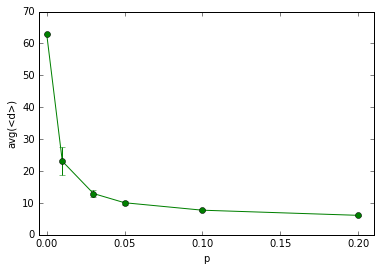

In [29]:
# Plot an error bar with the different values of p on the x-axis, and the average distance for a given p value on the y-axis
plt.errorbar(p_values, avg_d, avg_std, marker='o', color='green')
# Resize the axises for nicer visualisation
plt.axis((-0.005, 0.21, 0, 70))
plt.xlabel('p')
plt.ylabel('avg(<d>)')
plt.show()

## Part 2: Scale-free networks

### Exercises of the book

#### What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one.

The three slope dependent regimes are : 
* Anomalous Regime (γ≤ 2) : large scale-free networks in this regime cannot exist
* Scale-Free Regime (2 ‹ γ ‹ 3) : actual scale-free networks (ultra-small) - the first moment of the degree distribution is finite but not the second one, which means we have high divergence. 
* Random Network Regime (γ › 3) : the scale-free networks in this regime are undistinguishable from a random networks (the degree distribution pk decays fast and hubs are smalls and less numerous) - the first and second moment of the degree distribution is finite. 

#### What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.

The three regimes found in non-linear preferential attachment are :
* No Preferential Attachment (α=0) : simple exponential degree distribution, similar to a random network without any hubs
* Sublinear Preferential Attachment (0 < α < 1) : the degrees follow a strectched exponential distribution and limits the size and the number of nodes of the network (as well as a much slower growth of the maximum degree) 
* Superlinear Preferential Attachment (α > 1) : hub-and-spoke topology where we have super hubs (originated by the earliest nodes)

### Exercises on Barabarsi-Albert models 

#### First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).

In [85]:
# Create a simple graph 
BA = nx.Graph()

# Add a link between node 1 and 2 to it
BA.add_edges_from([(1,2)])

#### Now add another node, connecting one of the existing nodes in proportion to their degree.

In [86]:
# Add node 3 and connect it to node 2
BA.add_edges_from([(2,3)])

#### Keep going until you have a 100 node network.

In [87]:
import random

# Pick a random node to connect based on a graph G 
def get_node_to_connect_to(G):
    edges = G.edges()
    edges_flatten = [edge for connection in edges for edge in connection]
    return random.choice(edges_flatten)

100


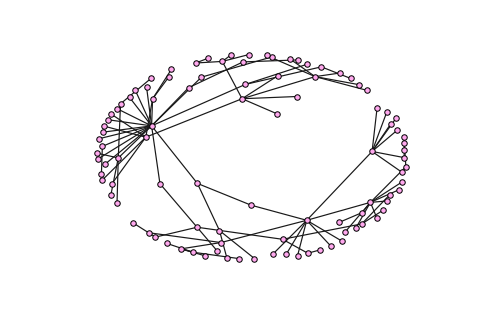

In [88]:
n = 100
start_node = 4
end_node = 100 + 1

# Generate a network of 100 nodes (knowing that we already have 3 nodes)
for i in range(start_node, end_node):
    random_node = get_node_to_connect_to(BA)
    BA.add_edge(i, random_node)

print len(BA.nodes())    
nx.draw(BA, node_size=30, node_color="#FFA8EE", node_shape='o', edge_color='.1', with_labels=False, width=1.2)
plt.show()

#### Add more nodes until you have a 5000 node network.

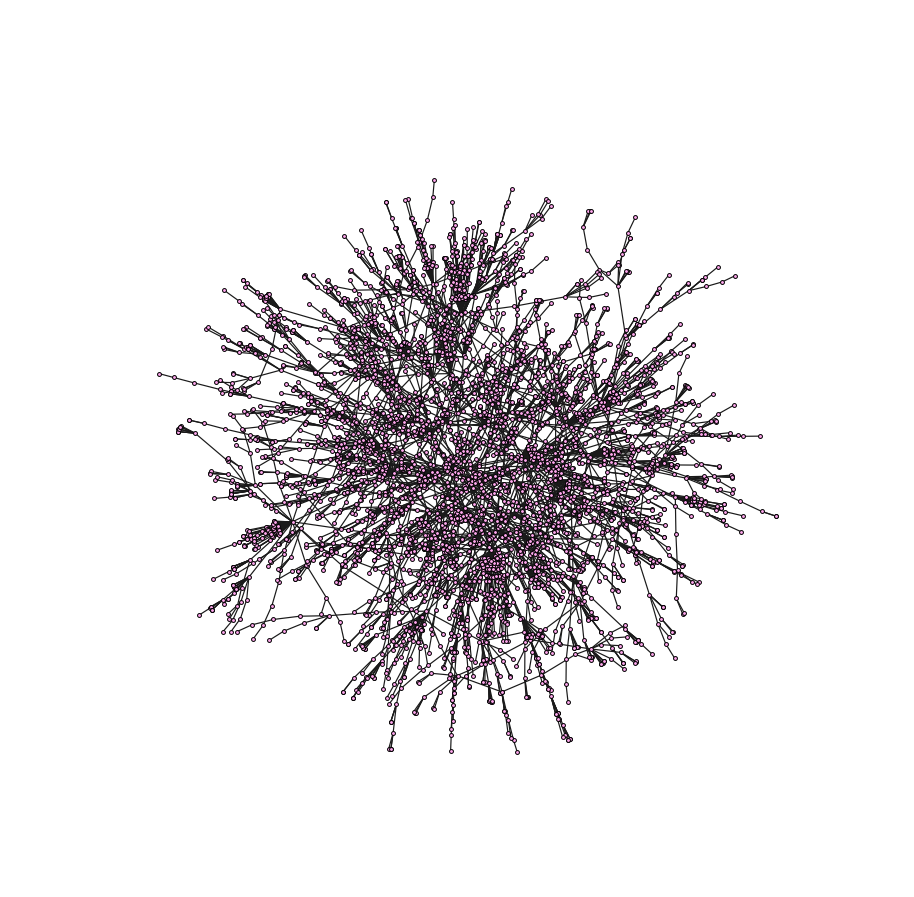

In [89]:
# Start from the previous end node 
start_node = end_node

# Generate a new node and a link to an existing connection by using the get_node_to_connect_to method
for i in range(start_node, 5000+1):
    random_node = get_node_to_connect_to(BA)
    BA.add_edges_from([(i, random_node)])

# Plot the network
plt.figure(figsize=(12,12)) 
nx.draw(BA, node_size=15, node_color="#FFA8EE", node_shape='o', edge_color='.1', with_labels=False, width=1.2)
plt.show()

#### What's the maximum and minimum degree?

In [90]:
# Retrieve the degrees of the network
degrees = nx.degree(BA).values()

# Compute min and max values for the degrees
max_degree = max(degrees)
min_degree = min(degrees)

print "Maximum degree : %f" % max_degree
print "Minimum degree : %f" % min_degree

Maximum degree : 137.000000
Minimum degree : 1.000000


#### Now, bin the degree distribution using numpy.histogram.

In [91]:
# Compute the bins for our degree distribution
bins = [i for i in range(min_degree, max_degree+1)]

degrees_hist, degrees_bin = np.histogram(degrees, bins=bins)

#### Plot the distribution. Plot it with both linear and log-log axes.

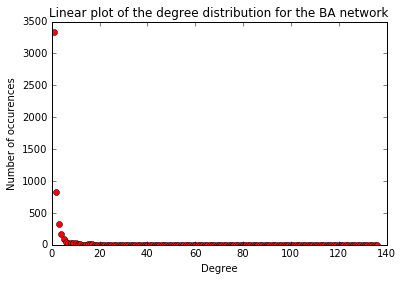

In [128]:
plt.plot(degrees_bin[:-1], degrees_hist, 'ro')
plt.xlabel('Degree')
plt.ylabel('Number of occurences')
plt.title('Linear plot of the degree distribution for the BA network')
plt.show()

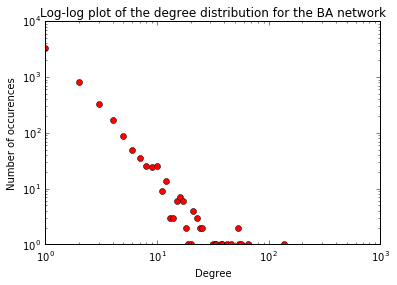

In [127]:
plt.plot(degrees_bin[:-1], degrees_hist, 'ro')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Degree')
plt.ylabel('Number of occurences')
plt.title('Log-log plot of the degree distribution for the BA network')
plt.show()

### Exercises on the Friendship Paradox

#### Pick a node i at random (e.g. use random.choice). Find its degree.

In [94]:
# Choose a random node in the list of nodes
node_i = random.choice(BA.nodes())

# Retreive the degree of that node
degree_i = BA.degree(node_i)

print degree_i

2


#### Find i's neighbors. And calculate their average degree.

In [97]:
# Get the neighbors of node i
neighbors_i = BA.neighbors(i)

# Retrieve the degree of each neighbor of node i and compute the average 
degrees_neighbors_i = [BA.degree(neighbor_i) for neighbor_i in neighbors_i]
avg_degree_neighbors_i = np.average(degrees_neighbors_i)

print avg_degree_neighbors_i

2.375


#### Compare the two numbers to check if it's true that i's friends (on average) have more friends than i.

In [98]:
print "i has %f friends whereas, on average, i's friends have %f friends" % (degree_i, avg_degree_neighbors_i)

i has 2.000000 friends whereas on average, i's friends have 2.375000 friends


#### Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

In [101]:
def compute_random_node_degree_and_friends(G):
    # Choose a random node in the list of nodes
    node_i = random.choice(G.nodes())

    # Retreive the degree of that node
    degree_i = G.degree(node_i)
    
    # Get the neighbors of node i
    neighbors_i = G.neighbors(node_i)
    
    # Retrieve the degree of each neighbor of node i and compute the average 
    degrees_neighbors_i = [G.degree(neighbor_i) for neighbor_i in neighbors_i]
    avg_degree_neighbors_i = np.average(degrees_neighbors_i)
    
    return (degree_i, avg_degree_neighbors_i)

def is_friend_paradox_true(degree_i, avg_degree_neighbors_i):
    return degree_i < avg_degree_neighbors_i

In [103]:
nb_paradox_true = 0
for i in range(1000):
    (degree_i, avg_degree_neighbors_i) = compute_random_node_degree_and_friends(BA)
    if is_friend_paradox_true(degree_i, avg_degree_neighbors_i) == True:
        nb_paradox_true += 1

print "The paradox is true %d times out of 1000" % nb_paradox_true

The paradox is true 884 times out of 1000


#### Compare to the ER network of same size and same p. What are the differences? Explain in your own words. Hint: To get started, take a look at the degree distribution, and study the number of connected components.

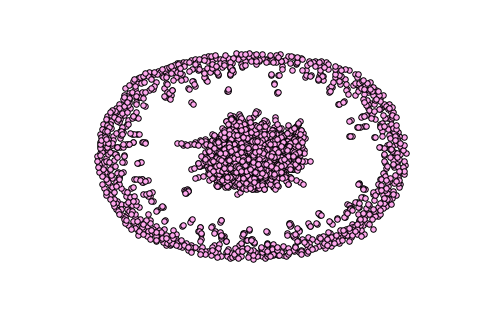

In [105]:
# Create the graph by using the built-in ER graph generator with the provided arguments
N = 5000
k = np.average(degrees)
p = k / (N - 1.)

ER = nx.erdos_renyi_graph(N, p)

plt.figure(figsize=(12,12))
nx.draw(ER, node_size=30, node_color="#FFA8EE", node_shape='o', edge_color='.1', with_labels=False, width=1.2)
plt.show()

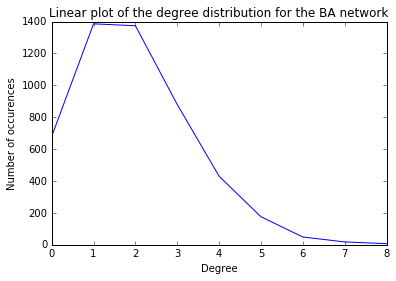

In [129]:
ER_degrees = nx.degree(ER).values()

bins = [i for i in range(min(ER_degrees), max(ER_degrees)+1)]

ER_degrees_hist, ER_degrees_bin = np.histogram(ER_degrees, bins=bins)

plt.plot(ER_degrees_bin[:-1], ER_degrees_hist)
plt.xlabel('Degree')
plt.ylabel('Number of occurences')
plt.title('Linear plot of the degree distribution for the BA network')
plt.show()

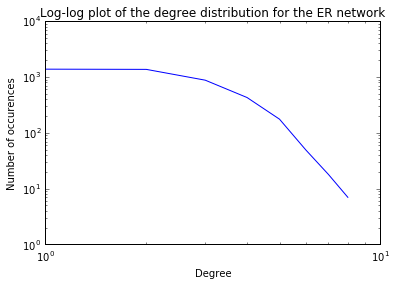

In [130]:
plt.plot(ER_degrees_bin[:-1], ER_degrees_hist)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Degree')
plt.ylabel('Number of occurences')
plt.title('Log-log plot of the degree distribution for the ER network')
plt.show()

In [125]:
ER_nb_connected_comp = nx.number_connected_components(ER)
BA_nb_connected_comp = nx.number_connected_components(BA)

print "Number of connected component in ER : %d" % ER_nb_connected_comp
print "Number of connected component in BA : %d" % BA_nb_connected_comp

Number of connected component in ER : 842
Number of connected component in BA : 1


We can cleary see that the ER model is a random network with the familiar bell curve for the degree distribution. 
Moreover, the number of connected components is huge in the ER network (842), whereas in our BA network we only have one connected component as predicted. 